In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
file_path = "../data/multisocket/h5bench_dlio_summary.csv"

df = pd.read_csv(
    file_path,
    delimiter=",",
    encoding="utf-8",
    header=0
)

In [4]:
df.head()

,nodes,taskspernode,readthreads,cpufreq,slurm_job_id,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe0,elb0,ece0,ese0,ete0,empe0,emlb0,emce0,emse0,emte0,eope0,eolb0,eoce0,eose0,eote0,epe1,elb1,ece1,ese1,ete1,empe1,emlb1,emce1,emse1,emte1,eope1,eolb1,eoce1,eose1,eote1,total_time
0,1,48,0,1000000,61903937,0.838,0.972,0.862,0.984,0.876,0.838,0.972,0.862,0.984,0.876,1.0,1.0,1.0,1.0,1.0,0.848,0.998,0.850,0.966,0.881,3.434,0.998,3.442,0.966,3.564,0.247,1.0,0.247,1.0,0.247,0.850,0.974,0.873,0.991,0.881,3.441,0.974,3.533,0.991,3.564,0.247,1.0,0.247,1.0,0.247,3628.998
1,1,48,0,1500000,61903938,0.893,0.998,0.895,0.996,0.899,0.893,0.998,0.895,0.996,0.899,1.0,1.0,1.0,1.0,1.0,0.901,0.998,0.903,0.996,0.906,4.985,0.998,4.994,0.996,5.011,0.181,1.0,0.181,1.0,0.181,0.902,0.999,0.902,0.996,0.906,4.986,0.999,4.990,0.996,5.011,0.181,1.0,0.181,1.0,0.181,3376.566
2,1,48,0,2000000,61888329,0.916,0.998,0.918,0.997,0.920,0.916,0.998,0.918,0.997,0.920,1.0,1.0,1.0,1.0,1.0,0.920,0.998,0.922,0.998,0.924,4.177,0.998,4.184,0.998,4.193,0.220,1.0,0.220,1.0,0.220,0.921,1.000,0.921,0.997,0.924,4.178,1.000,4.179,0.997,4.193,0.220,1.0,0.220,1.0,0.220,3274.389
3,1,48,0,2500000,61888330,0.905,0.990,0.914,0.992,0.922,0.905,0.990,0.914,0.992,0.922,1.0,1.0,1.0,1.0,1.0,0.910,1.000,0.910,0.983,0.925,103.997,1.000,104.010,0.983,105.788,0.009,1.0,0.009,1.0,0.009,0.911,0.992,0.918,0.993,0.925,104.125,0.992,105.007,0.993,105.788,0.009,1.0,0.009,1.0,0.009,3295.254
4,1,48,0,3000000,61888331,0.908,0.995,0.913,0.988,0.923,0.908,0.995,0.913,0.988,0.923,1.0,1.0,1.0,1.0,1.0,0.912,1.000,0.912,0.986,0.925,3.808,1.000,3.810,0.986,3.862,0.239,1.0,0.239,1.0,0.239,0.913,0.996,0.917,0.991,0.925,3.812,0.996,3.828,0.991,3.862,0.239,1.0,0.239,1.0,0.239,3277.567


In [5]:
df.shape

(14, 51)

In [6]:
df.columns[(df > 1).any(axis=0)]
# PE, CommE, SerE, TE
# MPI SerE
# OMP PE, OMP CommE, OMP SerE, OMP TE

Index(['taskspernode', 'cpufreq', 'slurm_job_id', 'empe0', 'emce0', 'emte0',
       'ese1', 'empe1', 'emce1', 'emse1', 'emte1', 'total_time'],
      dtype='object')

In [7]:
int_cols = ["nodes", "taskspernode", "readthreads", "cpufreq", "slurm_job_id", "total_time"]
numeric_cols = [col for col in df.columns if col not in int_cols and pd.api.types.is_numeric_dtype(df[col])]

mask = (df[numeric_cols] > 1.01).any(axis=1)
filtered_df = df[mask]
filtered_df

,nodes,taskspernode,readthreads,cpufreq,slurm_job_id,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe0,elb0,ece0,ese0,ete0,empe0,emlb0,emce0,emse0,emte0,eope0,eolb0,eoce0,eose0,eote0,epe1,elb1,ece1,ese1,ete1,empe1,emlb1,emce1,emse1,emte1,eope1,eolb1,eoce1,eose1,eote1,total_time
0,1,48,0,1000000,61903937,0.838,0.972,0.862,0.984,0.876,0.838,0.972,0.862,0.984,0.876,1.0,1.0,1.0,1.0,1.0,0.848,0.998,0.850,0.966,0.881,3.434,0.998,3.442,0.966,3.564,0.247,1.0,0.247,1.0,0.247,0.850,0.974,0.873,0.991,0.881,3.441,0.974,3.533,0.991,3.564,0.247,1.0,0.247,1.0,0.247,3628.998
1,1,48,0,1500000,61903938,0.893,0.998,0.895,0.996,0.899,0.893,0.998,0.895,0.996,0.899,1.0,1.0,1.0,1.0,1.0,0.901,0.998,0.903,0.996,0.906,4.985,0.998,4.994,0.996,5.011,0.181,1.0,0.181,1.0,0.181,0.902,0.999,0.902,0.996,0.906,4.986,0.999,4.990,0.996,5.011,0.181,1.0,0.181,1.0,0.181,3376.566
2,1,48,0,2000000,61888329,0.916,0.998,0.918,0.997,0.920,0.916,0.998,0.918,0.997,0.920,1.0,1.0,1.0,1.0,1.0,0.920,0.998,0.922,0.998,0.924,4.177,0.998,4.184,0.998,4.193,0.220,1.0,0.220,1.0,0.220,0.921,1.000,0.921,0.997,0.924,4.178,1.000,4.179,0.997,4.193,0.220,1.0,0.220,1.0,0.220,3274.389
3,1,48,0,2500000,61888330,0.905,0.990,0.914,0.992,0.922,0.905,0.990,0.914,0.992,0.922,1.0,1.0,1.0,1.0,1.0,0.910,1.000,0.910,0.983,0.925,103.997,1.000,104.010,0.983,105.788,0.009,1.0,0.009,1.0,0.009,0.911,0.992,0.918,0.993,0.925,104.125,0.992,105.007,0.993,105.788,0.009,1.0,0.009,1.0,0.009,3295.254
4,1,48,0,3000000,61888331,0.908,0.995,0.913,0.988,0.923,0.908,0.995,0.913,0.988,0.923,1.0,1.0,1.0,1.0,1.0,0.912,1.000,0.912,0.986,0.925,3.808,1.000,3.810,0.986,3.862,0.239,1.0,0.239,1.0,0.239,0.913,0.996,0.917,0.991,0.925,3.812,0.996,3.828,0.991,3.862,0.239,1.0,0.239,1.0,0.239,3277.567
5,1,48,0,3500000,61888332,0.904,0.988,0.915,0.994,0.921,0.904,0.988,0.915,0.994,0.921,1.0,1.0,1.0,1.0,1.0,0.906,1.000,0.906,0.982,0.923,23.517,1.000,23.520,0.982,23.948,0.039,1.0,0.039,1.0,0.039,0.907,0.989,0.917,0.994,0.923,23.547,0.989,23.798,0.994,23.948,0.039,1.0,0.039,1.0,0.039,3282.097
6,1,48,0,3800000,61888333,0.910,0.999,0.911,0.998,0.913,0.910,0.999,0.911,0.998,0.913,1.0,1.0,1.0,1.0,1.0,0.913,0.999,0.914,0.998,0.915,66.931,0.999,66.989,0.998,67.100,0.014,1.0,0.014,1.0,0.014,0.913,1.000,0.913,0.998,0.915,66.953,1.000,66.963,0.998,67.100,0.014,1.0,0.014,1.0,0.014,3274.274
10,1,96,0,2500000,61888337,0.857,0.988,0.867,0.988,0.878,0.857,0.988,0.867,0.988,0.878,1.0,1.0,1.0,1.0,1.0,0.824,0.999,0.825,0.979,0.843,837.641,0.999,838.667,0.979,856.661,0.001,1.0,0.001,1.0,0.001,0.825,0.981,0.841,0.997,0.843,838.208,0.981,854.481,0.997,856.661,0.001,1.0,0.001,1.0,0.001,1958.993
11,1,96,0,3000000,61888338,0.856,0.982,0.872,0.991,0.879,0.856,0.982,0.872,0.991,0.879,1.0,1.0,1.0,1.0,1.0,0.797,0.999,0.798,0.973,0.821,13.910,0.999,13.928,0.973,14.312,0.057,1.0,0.057,1.0,0.057,0.798,0.971,0.823,1.003,0.821,13.927,0.971,14.350,1.003,14.312,0.057,1.0,0.057,1.0,0.057,1932.775
12,1,96,0,3500000,61888339,0.864,0.987,0.875,0.991,0.883,0.864,0.987,0.875,0.991,0.883,1.0,1.0,1.0,1.0,1.0,0.807,0.999,0.808,0.976,0.827,35.121,0.999,35.160,0.976,36.013,0.023,1.0,0.023,1.0,0.023,0.808,0.978,0.826,0.999,0.827,35.163,0.978,35.968,0.999,36.013,0.023,1.0,0.023,1.0,0.023,1939.968


In [8]:
# df_without_overflow = df[(df["total_time"] > 748)]
# df_without_overflow
df_without_overflow = df

In [9]:
df_without_overflow.shape

(14, 51)

In [10]:
# df = df[(df["taskspernode"] != 96)]
# df.shape

In [11]:
def aligned_values_from_df(dframe, cpufreqs, column):
    vals = []
    for f in cpufreqs:
        rows = dframe[dframe["cpufreq"] == f]
        if len(rows) == 0:
            vals.append(np.nan)
        else:
            vals.append(rows.iloc[0][column])
    return np.array(vals, dtype=float)

In [12]:
tasks = sorted(set(df["taskspernode"].unique()).union(set(df_without_overflow["taskspernode"].unique())))
tasks

[48, 96]

In [13]:
cpufreqs = sorted(df_without_overflow["cpufreq"].unique())
if len(cpufreqs) == 0:
    cpufreqs = sorted(df.loc[df["taskspernode"] == task, "cpufreq"].unique())
cpufreqs = np.array(cpufreqs)
cpufreqs

array([1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 3800000],
      dtype=int64)

In [14]:
runtime_data = {}
for task in tasks:
    total_time_arr = aligned_values_from_df(df[(df["taskspernode"] == task)], cpufreqs, "total_time")

    if np.isnan(total_time_arr).any():
        continue

    runtime_data[task] = total_time_arr

In [15]:
energy_data = {}
for task in tasks:
    total_energy_list = []
    for f in cpufreqs:
        path = f"../data/multisocket/h5bench_dlio_reports/{task}_ranks_{0}_threads_{f}_hz.csv"
        if os.path.exists(path):
            df_single = pd.read_csv(path)
            total_energy = df_single.groupby("socket")["total_energy"].max().sum()
            total_energy_list.append(total_energy)
        else:
            print(f"[WARN] No report for task={task} cpufreq={f}")
            total_energy_list.append(np.nan)

    total_energy_arr = np.array(total_energy_list)
    if np.isnan(total_energy_arr).any():
        continue

    energy_data[task] = total_energy_arr

In [16]:
wattage_data = {}
for task in tasks:
    rt = np.array(runtime_data[task], dtype=float)
    en = np.array(energy_data[task], dtype=float)
    with np.errstate(divide='ignore', invalid='ignore'):
        watt = np.where(rt > 0, en / rt, np.nan)
    wattage_data[task] = watt

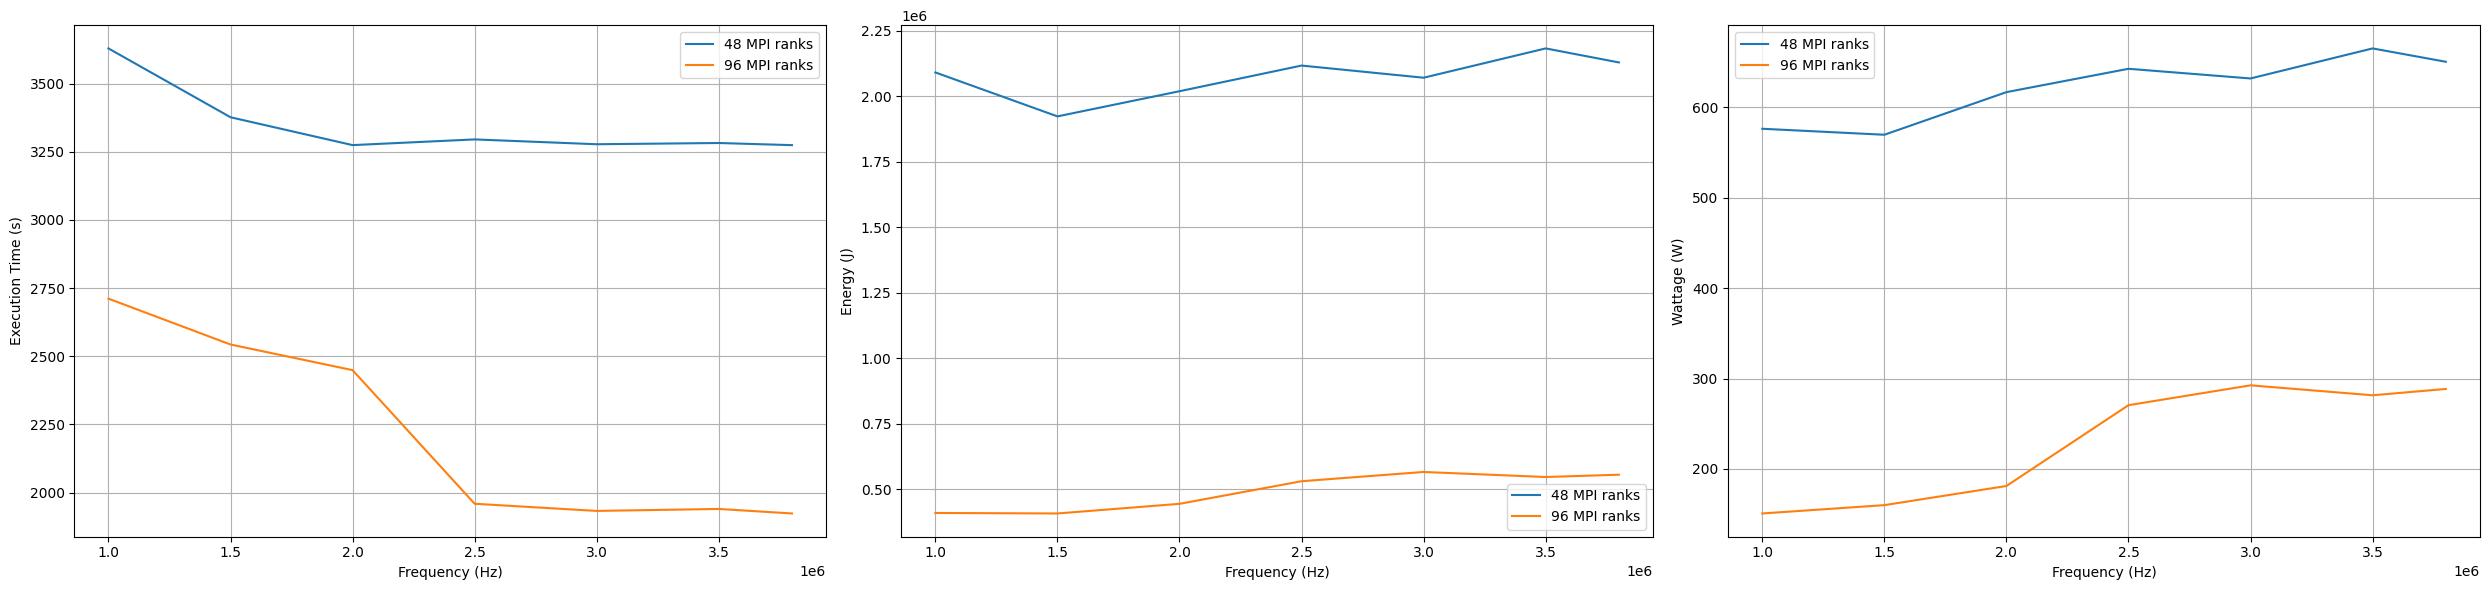

[SAVED] ../results/multisocket/h5bench_dlio_runtime_energy_wattage.png


In [17]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), squeeze=False)
outpath = "../results/multisocket/h5bench_dlio_runtime_energy_wattage.png"

# Runtime
for task in tasks:
    axs[0, 0].plot(cpufreqs, runtime_data[task], label=f"{task} MPI ranks")    
axs[0, 0].set_xlabel('Frequency (Hz)')
axs[0, 0].set_ylabel('Execution Time (s)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Energy
for task in tasks:
    axs[0, 1].plot(cpufreqs, energy_data[task], label=f"{task} MPI ranks")
axs[0, 1].set_xlabel('Frequency (Hz)')
axs[0, 1].set_ylabel('Energy (J)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Power
for task in tasks:
    axs[0, 2].plot(cpufreqs, wattage_data[task], label=f"{task} MPI ranks")
axs[0, 2].set_xlabel('Frequency (Hz)')
axs[0, 2].set_ylabel('Wattage (W)')
axs[0, 2].legend()
axs[0, 2].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")

In [18]:
edp_data = {}
for task in tasks:
    rt = np.array(runtime_data[task], dtype=float)
    en = np.array(energy_data[task], dtype=float)
    edp_data[task] = en * rt

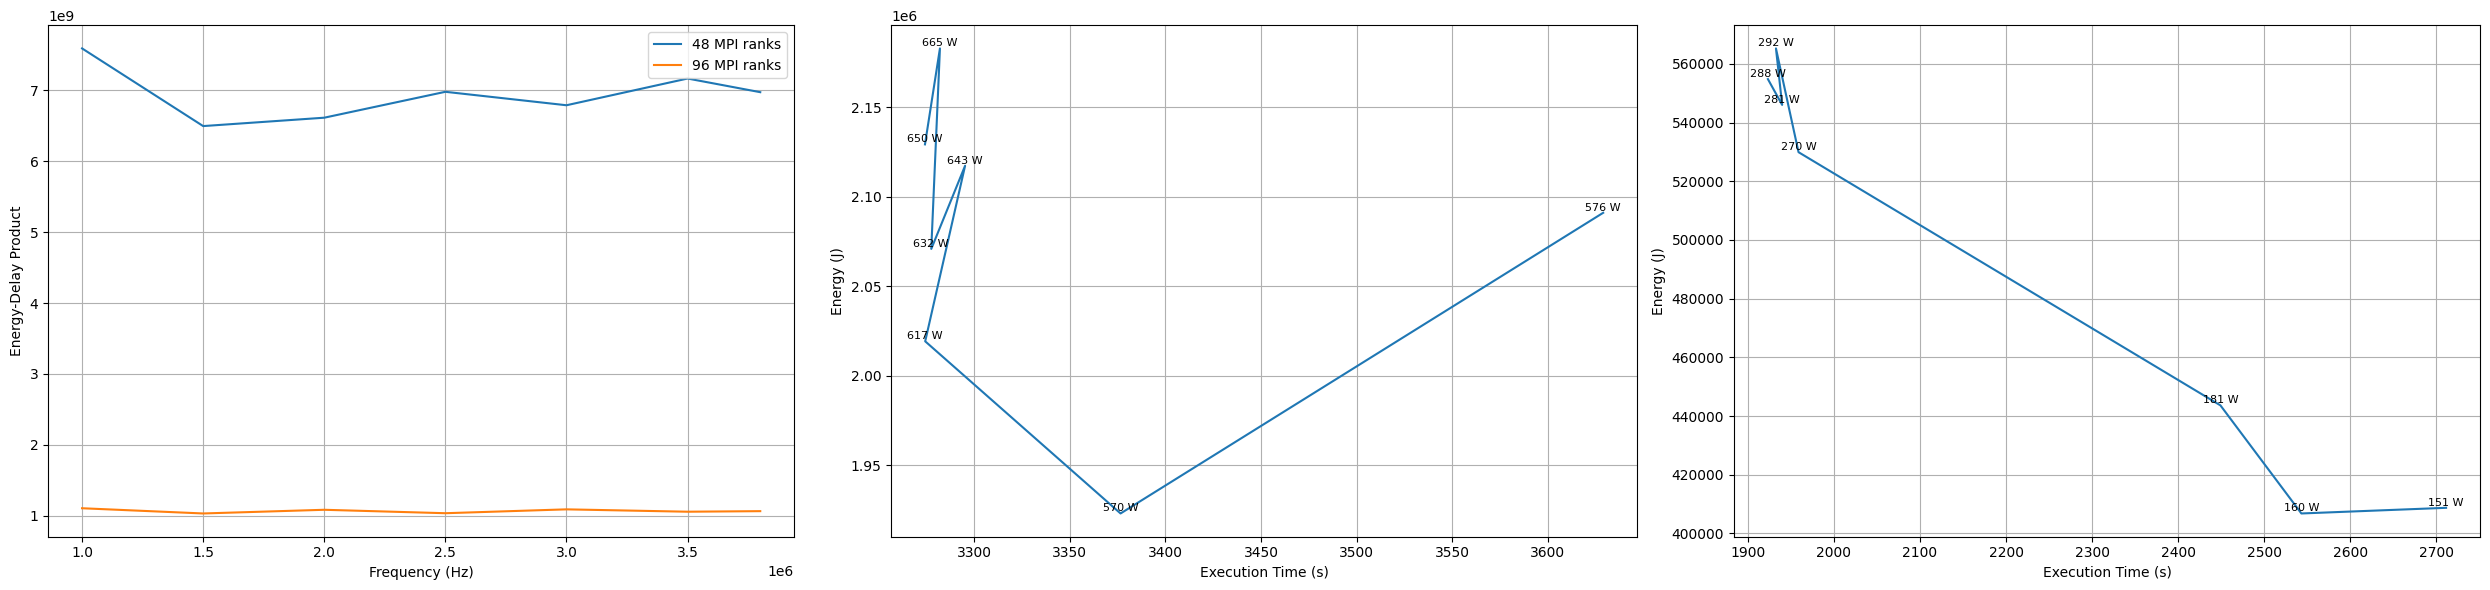

[SAVED] ../results/multisocket/h5bench_dlio_edp_runtime_vs_energy.png


In [19]:
runtime = np.linspace(runtime_data[task].min(), runtime_data[task].max())
fig, axs = plt.subplots(1, 3, figsize=(25, 6), squeeze=False)
outpath = "../results/multisocket/h5bench_dlio_edp_runtime_vs_energy.png"

# Energy-Delay Product
for task in tasks:
    axs[0, 0].plot(cpufreqs, edp_data[task], label=f"{task} MPI ranks")    
axs[0, 0].set_xlabel('Frequency (Hz)')
axs[0, 0].set_ylabel('Energy-Delay Product')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Energy vs Time
for i, task in enumerate(tasks):
    axs[0, i+1].plot(runtime_data[task], energy_data[task])

    for x, y, w in zip(runtime_data[task], energy_data[task], wattage_data[task]):
        axs[0, i+1].text(x, y + 5, f"{w:.0f} W", ha='center', va='bottom', fontsize=8)
    
    axs[0, i+1].set_xlabel('Execution Time (s)')
    axs[0, i+1].set_ylabel('Energy (J)')
    axs[0, i+1].grid(True)
    
plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")

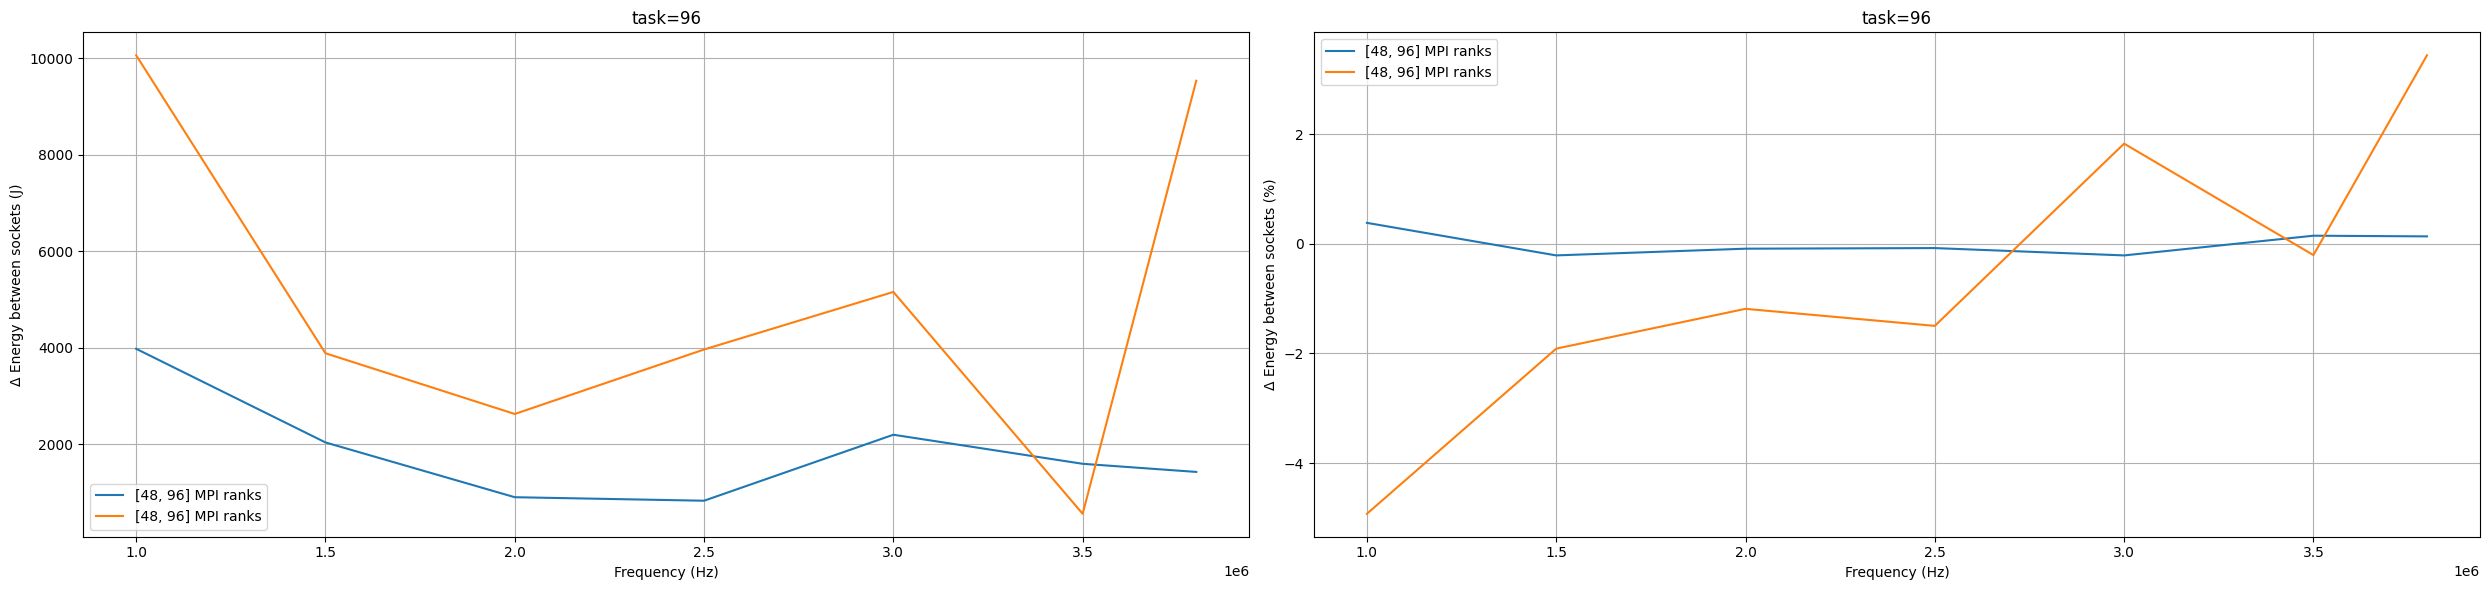

[SAVED] ../results/multisocket/h5bench_dlio_socket_energy_diff.png


In [20]:
fig, axs = plt.subplots(1, 2, figsize=(25, 6), squeeze=False)
outpath = "../results/multisocket/h5bench_dlio_socket_energy_diff.png"

diff_store = {}
diff_norm_store = {}

for i, task in enumerate(tasks):
    diff_vals = []
    diff_norm_vals = []

    for f in cpufreqs:
        path = f"../data/multisocket/h5bench_dlio_reports/{task}_ranks_{0}_threads_{f}_hz.csv"
        if not os.path.exists(path):
            print(f"[WARN] No report for task={task} cpufreq={f}")
            diff_vals.append(np.nan)
            diff_norm_vals.append(np.nan)
            continue

        df_single = pd.read_csv(path)
        if "socket" not in df_single.columns:
            print(f"[WARN] No socket info for task={task} cpufreq={f}")
            diff_vals.append(np.nan)
            diff_norm_vals.append(np.nan)
            continue

        socket_energy = df_single.groupby("socket")["total_energy"].max()
        diff = abs(socket_energy.iloc[0] - socket_energy.iloc[1])
        # Normalized Difference (Asymmetry)
        norm_diff = (socket_energy.iloc[0] - socket_energy.iloc[1]) / socket_energy.mean() * 100
        diff_vals.append(diff)
        diff_norm_vals.append(norm_diff)

    diff_store[task] = np.array(diff_vals)
    diff_norm_store[task] = np.array(diff_norm_vals)
    
    axs[0, 0].plot(cpufreqs, diff_store[task], label=f"{tasks} MPI ranks")
    axs[0, 0].set_title(f"task={task}")
    axs[0, 0].set_xlabel("Frequency (Hz)")
    axs[0, 0].set_ylabel("Δ Energy between sockets (J)")
    axs[0, 0].legend()
    axs[0, 0].grid(True)
    
    axs[0, 1].plot(cpufreqs, diff_norm_store[task], label=f"{tasks} MPI ranks")
    axs[0, 1].set_title(f"task={task}")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Δ Energy between sockets (%)")
    axs[0, 1].legend()
    axs[0, 1].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")